In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from lib import DihedralAdherence
from lib import PDBMineQuery
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pathlib import Path
PDBMINE_URL = os.getenv("PDBMINE_URL")
PROJECT_DIR = 'tests'

In [ ]:
# PDBMINE_URL = os.getenv("PDBMINE_URL")
# PROJECT_DIR = 'tests'
# casp_protein_ids = ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025', 'T1028', 'T1053']

# xray_phi_psi = []
# af_phi_psi = []
# all_phi_psi = []
# for id in casp_protein_ids:
#     da = DihedralAdherence(id, [4,5,6,7], PDBMINE_URL, PROJECT_DIR, kdews=[1,32,64,128])
#     da.load_results_da()
#     xray_phi_psi.append(da.xray_phi_psi.dropna())
#     print(xray_phi_psi[-1].shape)
#     af_phi_psi.append(da.phi_psi_predictions[da.phi_psi_predictions.protein_id == da.alphafold_id].dropna())
#     print(af_phi_psi[-1].shape)
#     all_phi_psi.append(da.phi_psi_predictions.dropna())
#     print(all_phi_psi[-1].shape)

# xray_phi_psi = pd.concat(xray_phi_psi).reset_index(drop=True)
# af_phi_psi = pd.concat(af_phi_psi).reset_index(drop=True)
# all_phi_psi = pd.concat(all_phi_psi).reset_index(drop=True)

In [ ]:
# fig, ax = plt.subplots(figsize=(12, 6))
# sns.set_palette("pastel")
# sns.kdeplot(data=xray_phi_psi, x='da', fill=True, hue='protein_id', ax=ax, multiple="stack")
# ax.set_title('Distribution of Distance from X-ray Dihedral Angles to PDBMine Prediction')
# ax.set_xlabel('Distance')
# plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize=(12, 6))
# sns.kdeplot(data=af_phi_psi, x='da', fill=True, hue='protein_id', ax=ax, multiple="stack")
# ax.set_title('Distribution of Distance from AlphaFold Dihedral Angles to PDBMine Prediction')
# ax.set_xlabel('Distance')
# plt.show()

In [ ]:
# all_phi_psi['target'] = all_phi_psi.protein_id.apply(lambda x: x[:5])
# fig, ax = plt.subplots(figsize=(12, 6))
# sns.kdeplot(data=all_phi_psi, x='da', fill=True, hue='target', ax=ax, multiple="stack")
# ax.set_title('Distribution of Distance from All Predicted Dihedral Angles to PDBMine Prediction')
# ax.set_xlabel('Distance')
# plt.show()

In [ ]:
# sns.set_palette('tab10')
# xray_phi_psi['Source'] = 'X-ray'
# af_phi_psi['Source'] = 'AlphaFold'
# all_phi_psi['Source'] = 'All Other Predictions'
# df = pd.concat([
#     xray_phi_psi.sample(3100), 
#     af_phi_psi.drop('da_na', axis=1).sample(3100),
#     all_phi_psi.sample(3100)
# ]).reset_index(drop=True)
# fig, ax = plt.subplots(figsize=(12, 6))
# sns.kdeplot(data=df, x='da', fill=True, hue='Source', ax=ax, common_norm=True)
# ax.set_title('Distribution of Distance from Dihedral Angles to PDBMine Prediction')
# ax.set_xlabel('Distance')
# plt.show()

Results already exist
Casp ID: T1024 	PDB: 6t1z
Structure exists: 'pdb/pdb6t1z.ent' 


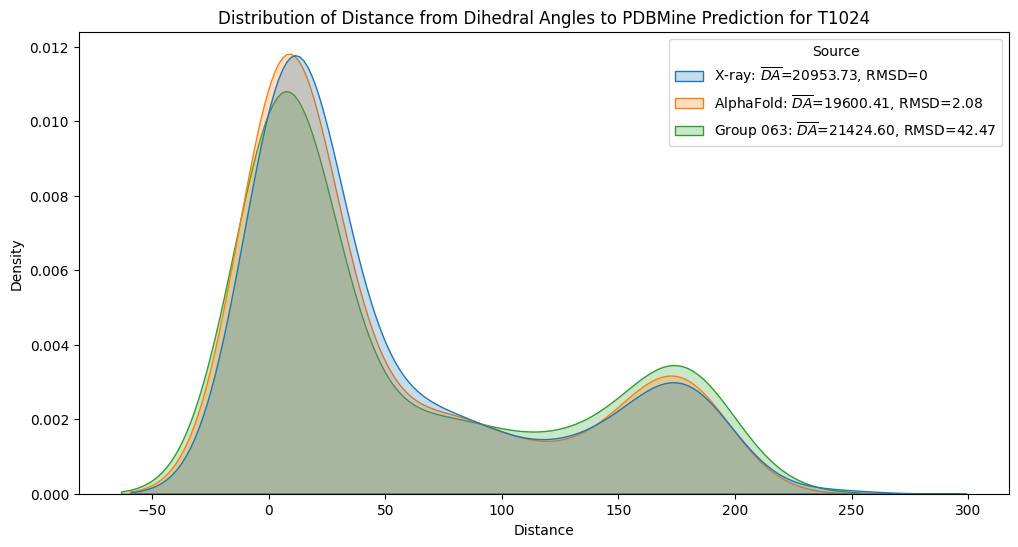

In [4]:
# Plot for one protein
casp_protein_id = 'T1024'
da = DihedralAdherence(casp_protein_id, [4,5,6,7], PDBMINE_URL, PROJECT_DIR, kdews=[1,32,64,128])
da.load_results_da()
xray_phi_psi = da.xray_phi_psi.dropna().copy()
good_id = da.grouped_preds.sort_values('RMS_CA').iloc[0].protein_id
bad_id = da.grouped_preds.sort_values('RMS_CA').iloc[-1].protein_id
good_phi_psi = da.phi_psi_predictions[da.phi_psi_predictions.protein_id == good_id].dropna().copy()
bad_phi_psi = da.phi_psi_predictions[da.phi_psi_predictions.protein_id == bad_id].dropna().copy()
sns.set_palette('tab10')
rmsd_da = da.grouped_preds.set_index('protein_id').loc[[good_id, bad_id], ['da', 'RMS_CA']]
xray_phi_psi['Source'] = 'X-ray: ' + r'$\overline{DA}$=' + f'{xray_phi_psi.da.sum():.2f}, RMSD=0'
good_phi_psi['Source'] = 'AlphaFold: ' + r'$\overline{DA}$=' + f'{rmsd_da.loc[good_id].da:.2f}, RMSD={rmsd_da.loc[good_id].RMS_CA:.2f}'
bad_phi_psi['Source'] = 'Group 063: ' + r'$\overline{DA}$=' + f'{rmsd_da.loc[bad_id].da:.2f}, RMSD={rmsd_da.loc[bad_id].RMS_CA:.2f}'
df = pd.concat([
    xray_phi_psi, 
    good_phi_psi.drop('da_na', axis=1),
    bad_phi_psi.drop('da_na', axis=1)
]).reset_index(drop=True)
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=df, x='da', fill=True, hue='Source', ax=ax, common_norm=False)
ax.set_title(f'Distribution of Distance from Dihedral Angles to PDBMine Prediction for {casp_protein_id}')
ax.set_xlabel('Distance')
plt.show()

In [9]:
da.sequence

'GKEFWNLDKNLQLRLGIVFLGAFSYGTVFSSMTIYYNQYLGSAITGILLALSAVATFVAGILAGFFADRNGRKPVMVFGTIIQLLGAALAIASNLPGHVNPWSTFIAFLLISFGYNFVITAGNAMIIDASNAENRKVVFMLDYWAQNLSVILGAALGAWLFRPAFEALLVILLLTVLVSFFLTTFVMTETFKPTVKVDNIFQAYKTVLQDKTYMIFMGANIATTFIIMQFDNFLPVHLSNSFKTITFWGFEIYGQRMLTIYLILACVLVVLLMTTLNRLTKDWSHQKGFIWGSLFMAIGMIFSFLTTTFTPIFIAGIVYTLGEIVYTPSVQTLGADLMNPEKIGSYNGVAAIKMPIASILAGLLVSISPMIKAIGVSLVLALTEVLAIILVLVAVNRHQKTKLNLEVLFQG'

37 381
               phi          psi       weight
count  3166.000000  3166.000000  3166.000000
mean    -84.802843    41.729912     1.903348
std      24.775000    85.945118     5.682612
min    -158.800000  -176.700000     1.000000
25%    -106.375000   -45.000000     1.000000
50%     -81.550000    78.700000     1.000000
75%     -64.000000   125.700000     1.000000
max     112.900000   179.000000    64.000000
Residue I of Window NFVITAG centered at 118 of NFVITAG
	Win 4: VITA - 3082 samples
	Win 5: FVITA - 76 samples
	Win 6: FVITAG - 8 samples
	Win 7: NFVITAG - 0 samples
KDEpeak:	 (-120.40, 121.60)
X-ray[118]:	 (-74.64, -59.50), DA=184.66
TS337_5[118]:	 (-63.15, -47.41), DA=178.44
AlphaFold[118]:	 (-67.78, -43.10), DA=172.90
Other Predictions DA:
                 0
count  448.000000
mean   172.306403
std     16.829015
min     36.092958
25%    170.388781
50%    174.601830
75%    178.572349
max    194.670284


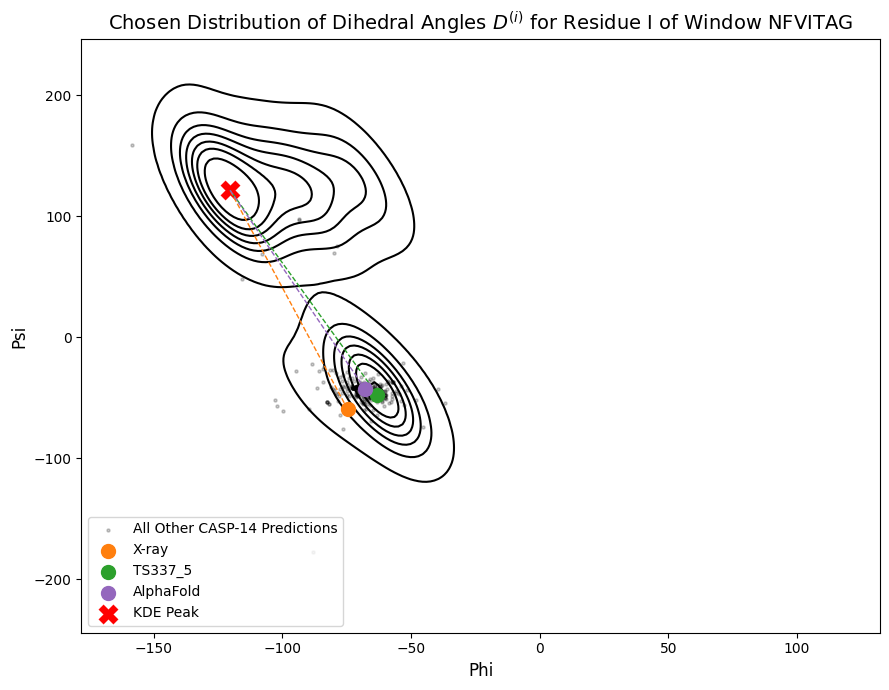

In [56]:
seqs = xray_phi_psi[(xray_phi_psi.da > 170) & (xray_phi_psi.da < 190)].seq_ctxt.values
print(len(seqs), len(xray_phi_psi))
da.plot_da_for_seq(seqs[12])

In [6]:
def calc_dist(xray_phi_psi, pred_phi_psi):
    df = pd.merge(xray_phi_psi, pred_phi_psi, on='seq_ctxt', suffixes=('_xray', '_pred'))
    xray = df[['phi_xray', 'psi_xray']].values
    pred = df[['phi_pred', 'psi_pred']].values
    def diff(x1, x2):
        d = np.abs(x1 - x2)
        return np.minimum(d, 360-d)
    dist = np.sqrt(diff(xray[:,0], pred[:,0])**2 + diff(xray[:,1], pred[:,1])**2)
    pred_phi_psi['da_to_xray'] = dist
calc_dist(xray_phi_psi, good_phi_psi)
calc_dist(xray_phi_psi, bad_phi_psi)

<Axes: xlabel='da_to_xray', ylabel='Density'>

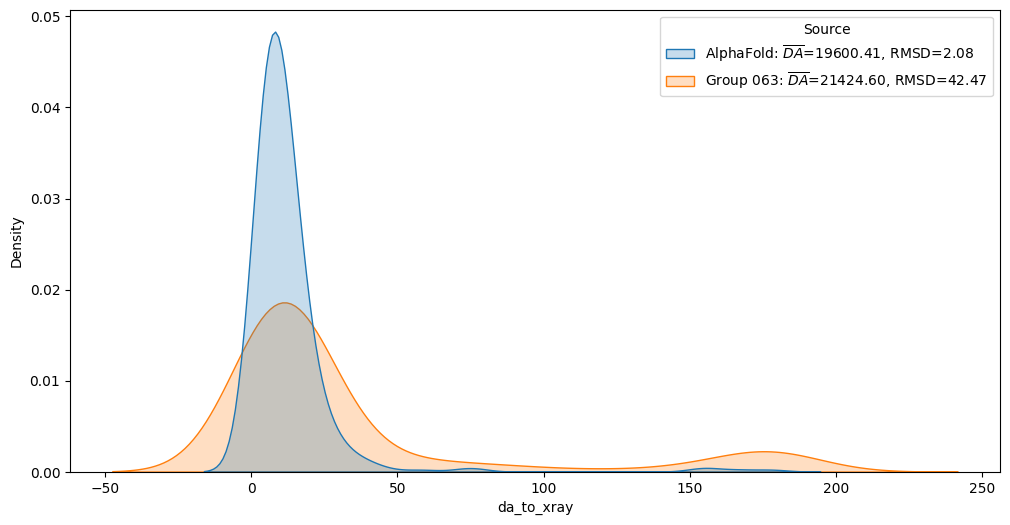

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
# sns.kdeplot(data=good_phi_psi, x='da', y='da_to_xray', ax=ax, fill=True)
# ax.set_title(f'Distance from Good Prediction to X-Ray vs Distance from X-Ray to PDBMine Prediction for {casp_protein_id}')
# ax.set_ylabel('Distance to X-Ray')
# ax.set_xlabel('Distance to PDBMine Prediction')
# ax.text(0.9, 0.9, f'RMSD=228.01', transform=ax.transAxes)
df = pd.concat([
    good_phi_psi.drop('da_na', axis=1),
    bad_phi_psi.drop('da_na', axis=1)
]).reset_index(drop=True)
sns.kdeplot(data=df, x='da_to_xray', fill=True, hue='Source', ax=ax, common_norm=False)

# Find second peak of dists

In [ ]:
from lib.utils import get_phi_psi_dist

da = DihedralAdherence('T1024', [4,5,6,7], PDBMINE_URL, PROJECT_DIR, kdews=[1,32,64,128])